In [1]:
# Solar Power Forecasting using Traditional and Hybrid Models

# Importing different models and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,  
    median_absolute_error,
    max_error,
    r2_score,
    explained_variance_score
)



In [46]:
# Loading Dataset 
df = pd.read_csv('Charanka_Power_Output_Final.csv')

In [47]:
# Preprocess the dataset

# Rename for datetime creation
df = df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day', 'HR': 'hour'})
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('Datetime', inplace=True)

# Feature and target selection
features = ['ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M', 'WS10M', 'WD10M']
target = 'Power_Output_kW'
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


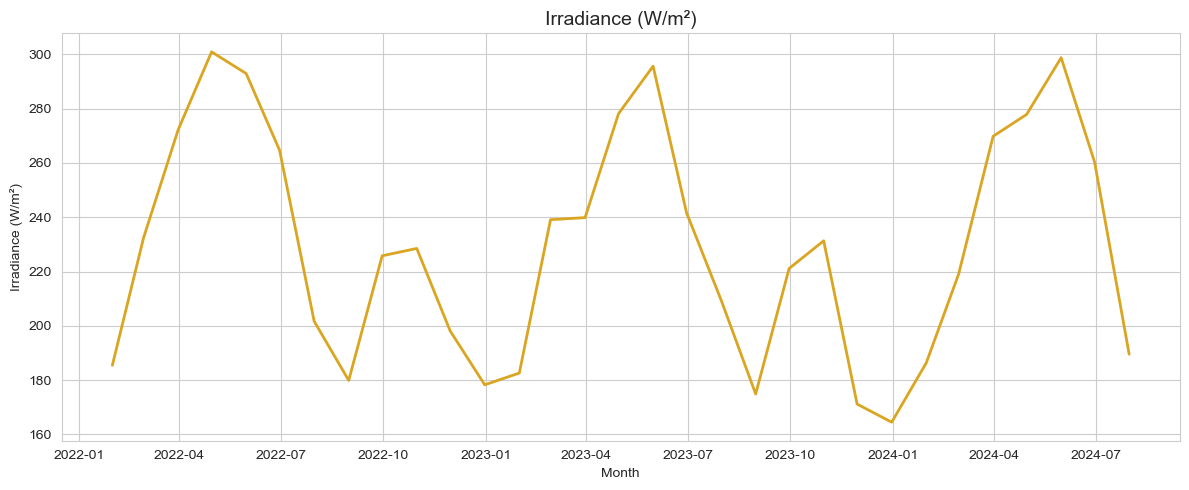

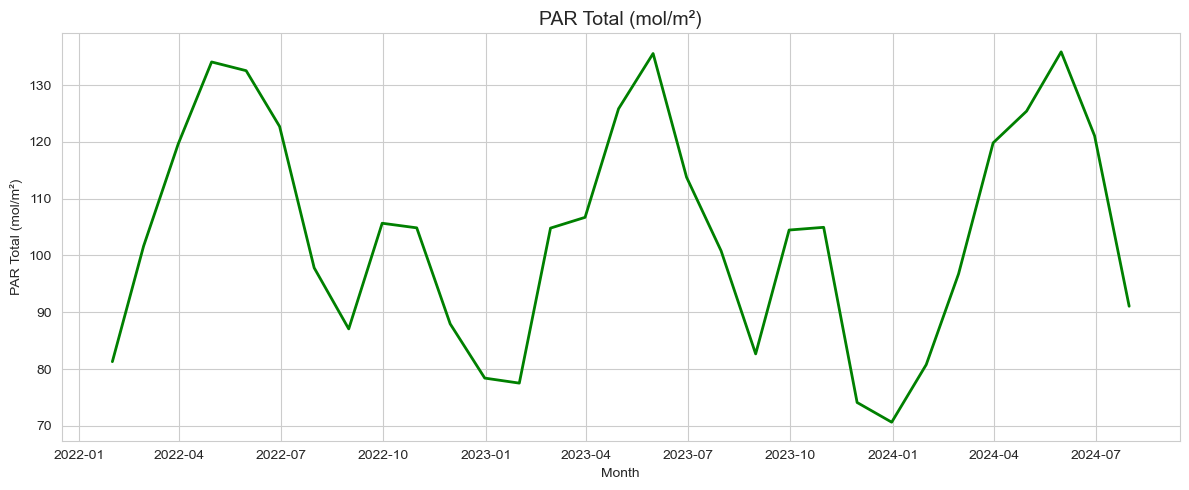

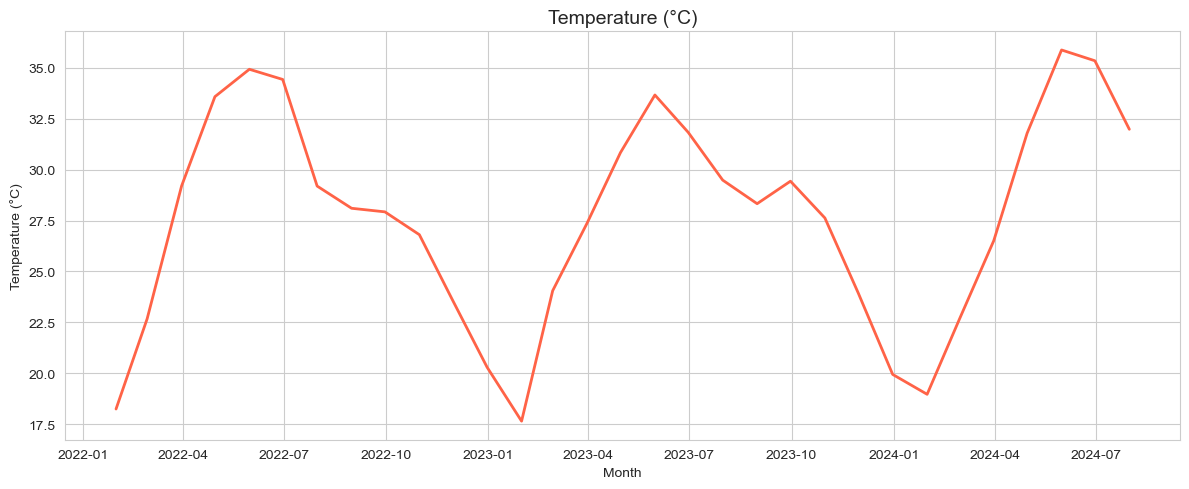

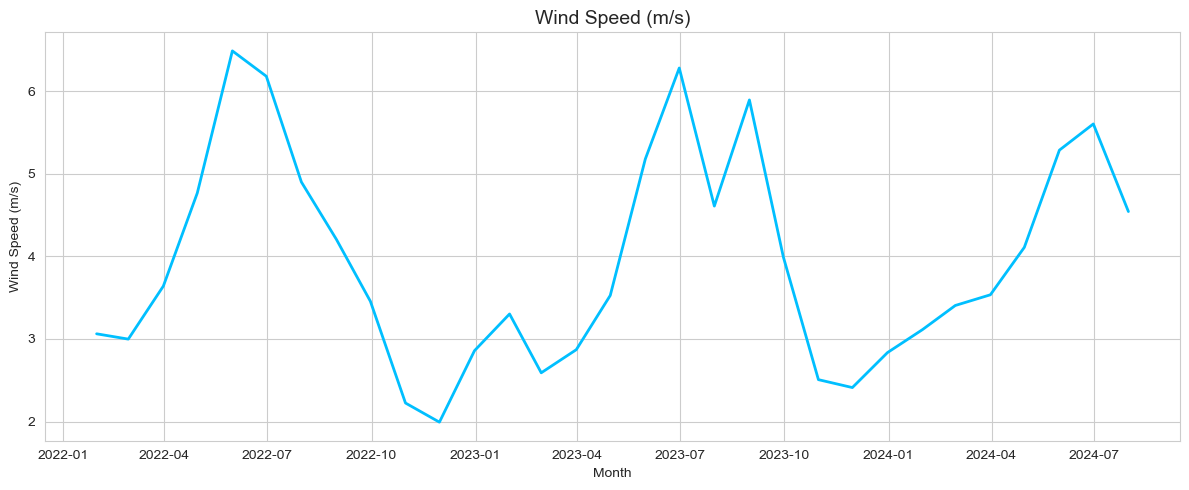

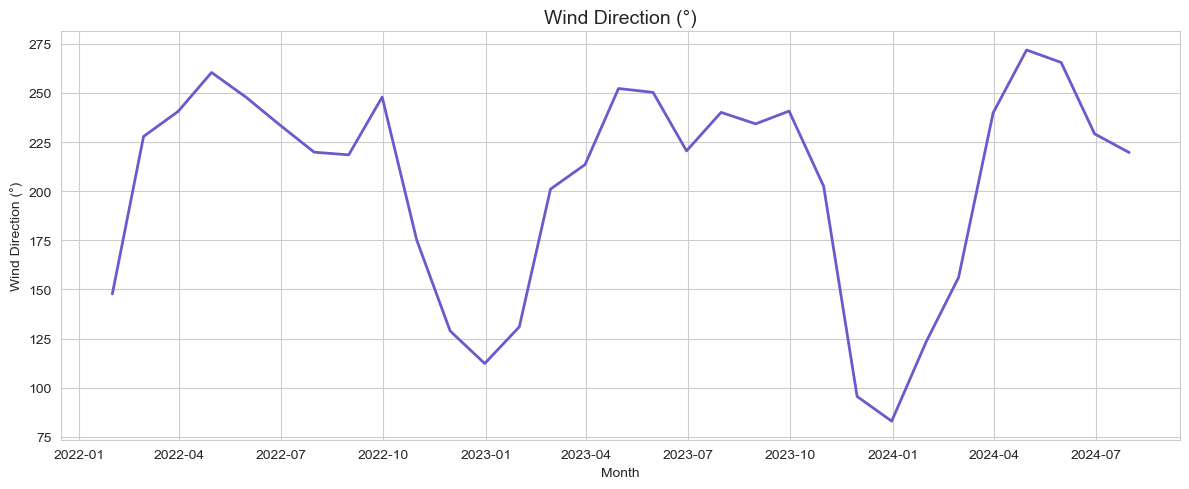

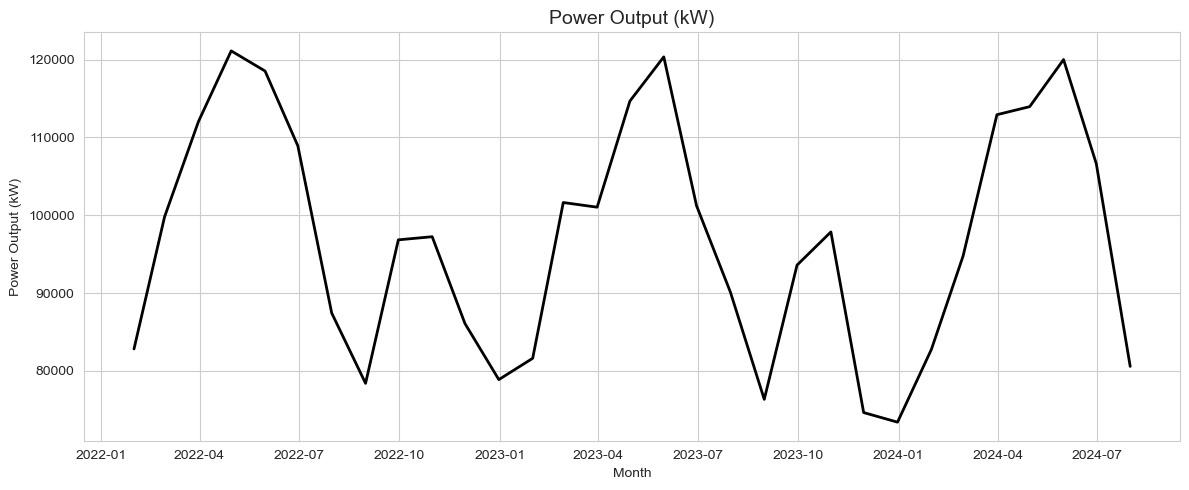

In [48]:
# Select relevant features to plot
features_to_plot = [
    'ALLSKY_SFC_SW_DWN',      # Irradiance
    'ALLSKY_SFC_PAR_TOT',     # PAR
    'T2M',                    # Temperature
    'WS10M',                  # Wind Speed
    'WD10M',                  # Wind Direction
    'Power_Output_kW'         # Output
]

# Compute monthly averages
monthly_df = df[features_to_plot].resample('M').mean()


# Plot settings
colors = ['goldenrod', 'green', 'tomato', 'deepskyblue', 'slateblue', 'black']
titles = [
    'Irradiance (W/m²)', 
    'PAR Total (mol/m²)', 
    'Temperature (°C)', 
    'Wind Speed (m/s)', 
    'Wind Direction (°)', 
    'Power Output (kW)'
]

# Generate individual plots
for feature, color, title in zip(features_to_plot, colors, titles):
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_df.index, monthly_df[feature], color=color, linewidth=2)
    plt.title(title, fontsize=14)
    plt.xlabel("Month")
    plt.ylabel(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

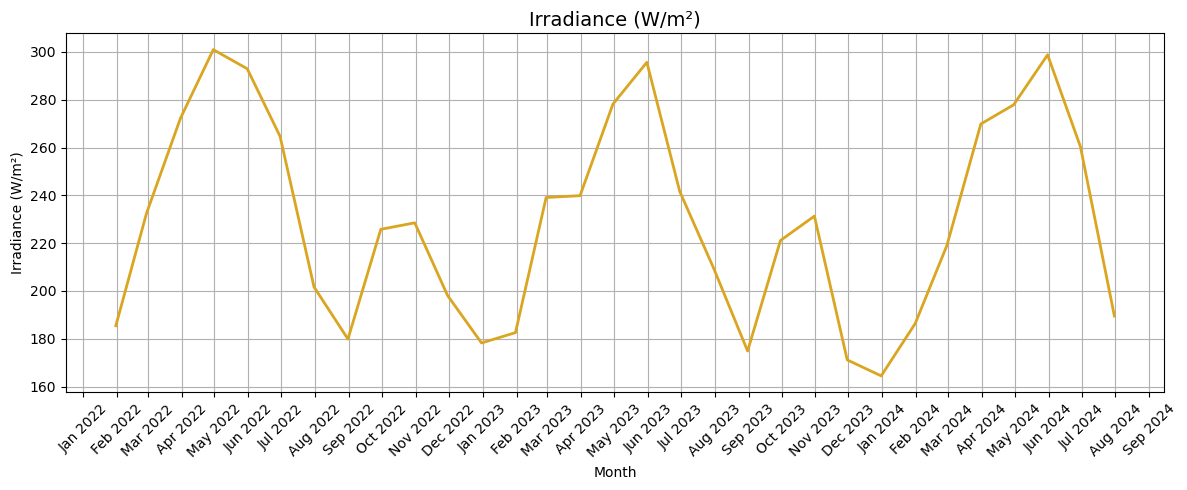

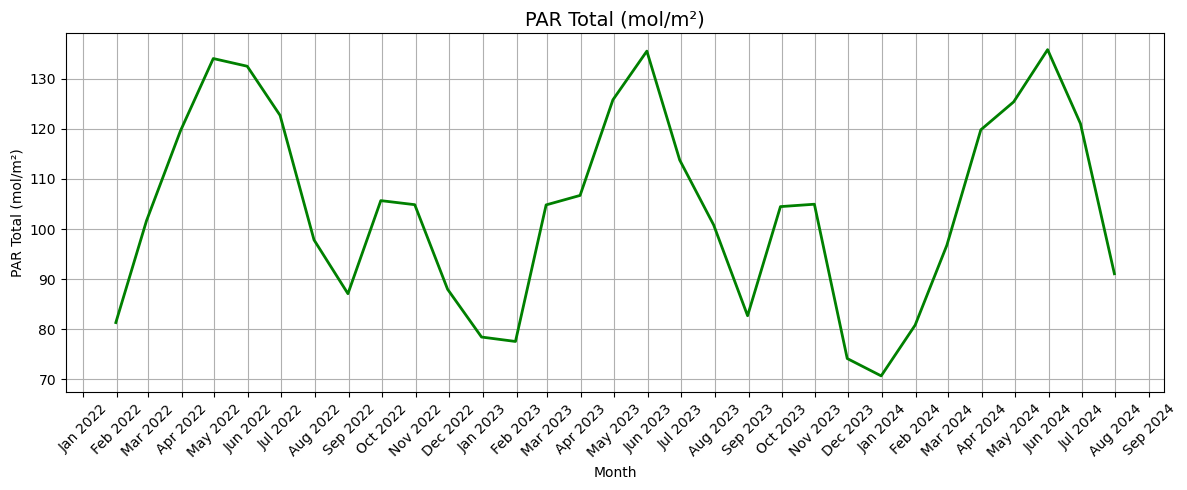

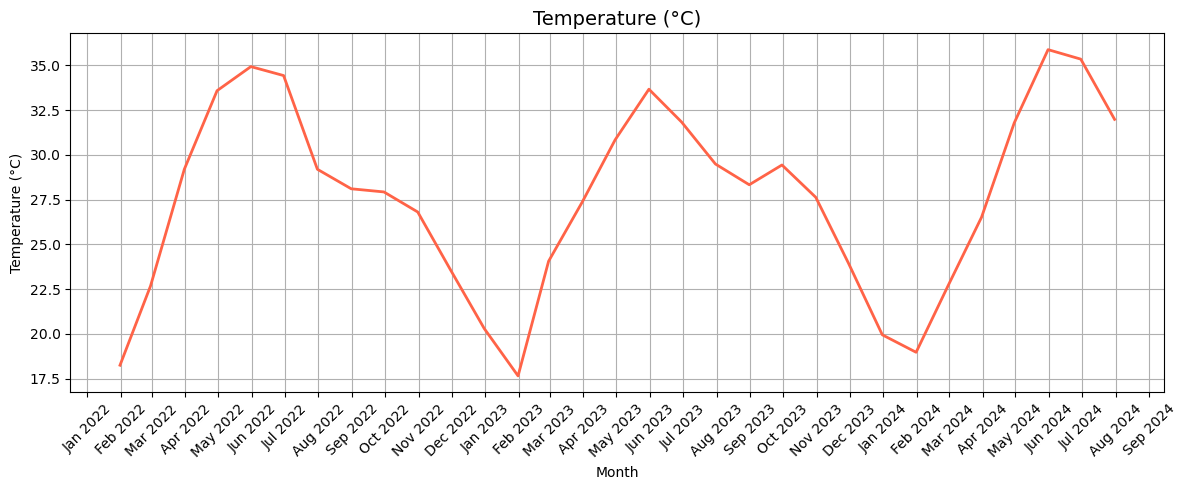

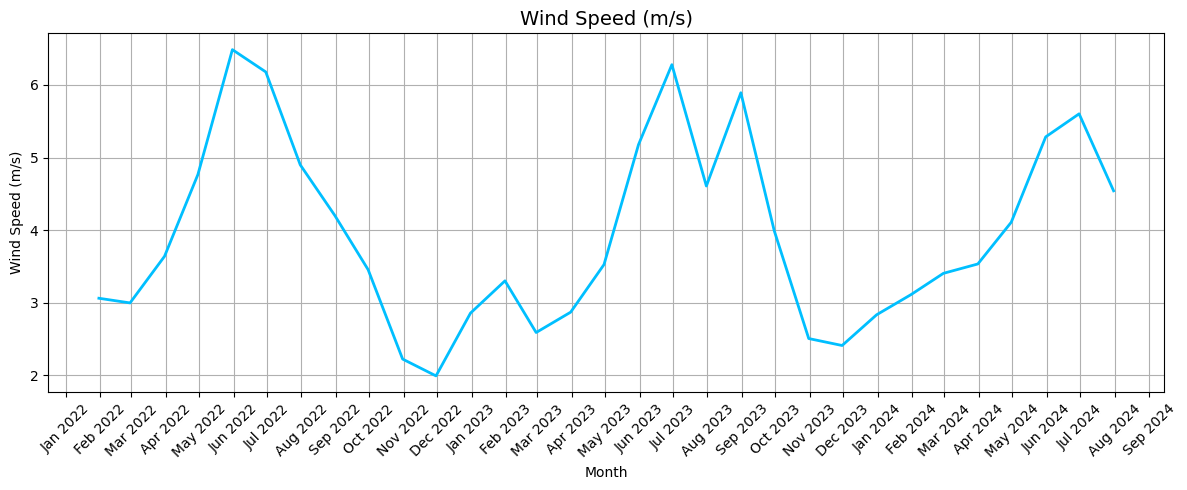

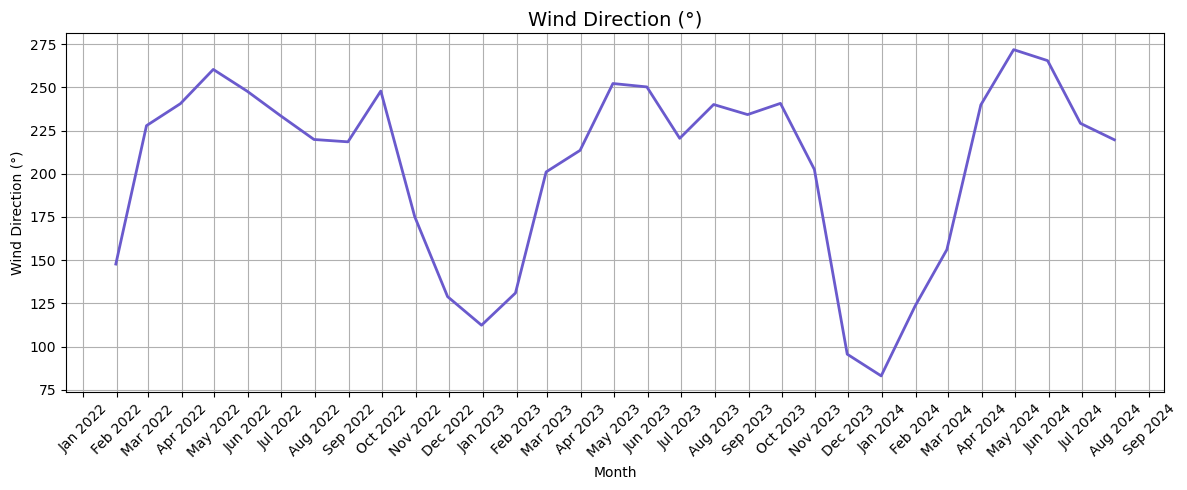

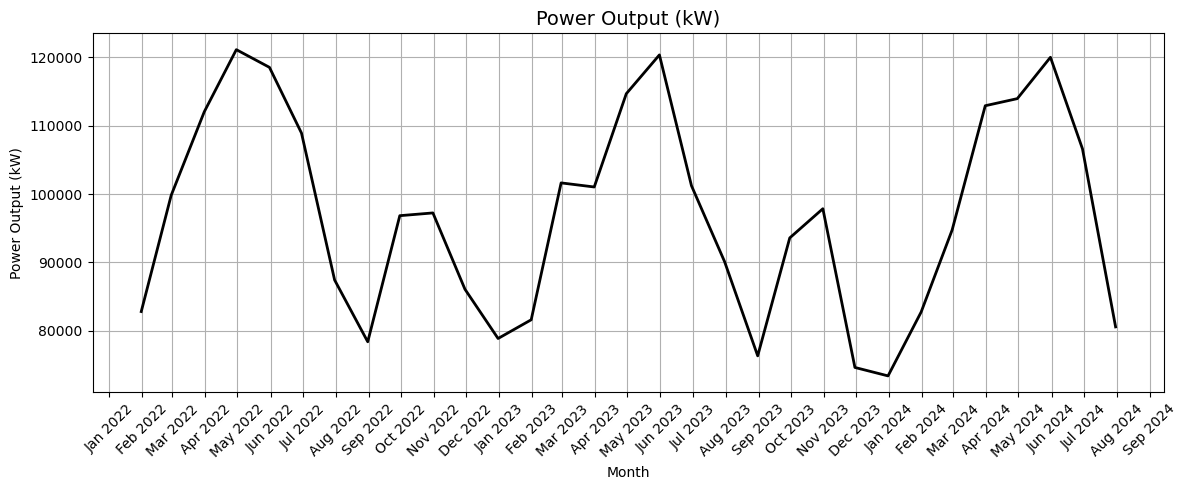

In [8]:
#Monthly Plots

import matplotlib.dates as mdates

for feature, color, title in zip(features_to_plot, colors, titles):
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_df.index, monthly_df[feature], color=color, linewidth=2)
    
    # Force x-axis ticks to show every month
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2022'
    
    plt.title(title, fontsize=14)
    plt.xlabel("Month")
    plt.ylabel(title)
    plt.grid(True)
    plt.xticks(rotation=45)  # Optional: rotate to avoid overlap
    plt.tight_layout()
    plt.show()


In [16]:
# Display basic information and a preview of the dataset
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_head, df_description

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22603 entries, 2022-01-01 00:00:00 to 2024-07-30 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                22603 non-null  int64  
 1   month               22603 non-null  int64  
 2   day                 22603 non-null  int64  
 3   hour                22603 non-null  int64  
 4   ALLSKY_SFC_SW_DWN   22603 non-null  float64
 5   ALLSKY_SFC_PAR_TOT  22603 non-null  float64
 6   T2M                 22603 non-null  float64
 7   WS10M               22603 non-null  float64
 8   WD10M               22603 non-null  float64
 9   Updated_T_C         22603 non-null  float64
 10  Power_Output_kW     22603 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 2.1 MB


(                     year  month  day  hour  ALLSKY_SFC_SW_DWN  \
 Datetime                                                         
 2022-01-01 00:00:00  2022      1    1     0                0.0   
 2022-01-01 01:00:00  2022      1    1     1                0.0   
 2022-01-01 02:00:00  2022      1    1     2                0.0   
 2022-01-01 03:00:00  2022      1    1     3                0.0   
 2022-01-01 04:00:00  2022      1    1     4                0.0   
 
                      ALLSKY_SFC_PAR_TOT    T2M  WS10M  WD10M  Updated_T_C  \
 Datetime                                                                    
 2022-01-01 00:00:00                 0.0  13.79   2.91   44.3        13.79   
 2022-01-01 01:00:00                 0.0  13.24   2.79   46.3        13.24   
 2022-01-01 02:00:00                 0.0  12.75   2.79   47.9        12.75   
 2022-01-01 03:00:00                 0.0  12.37   2.84   50.4        12.37   
 2022-01-01 04:00:00                 0.0  12.08   2.92   54.9

In [18]:
df2=df.copy()

<Axes: xlabel='Datetime'>

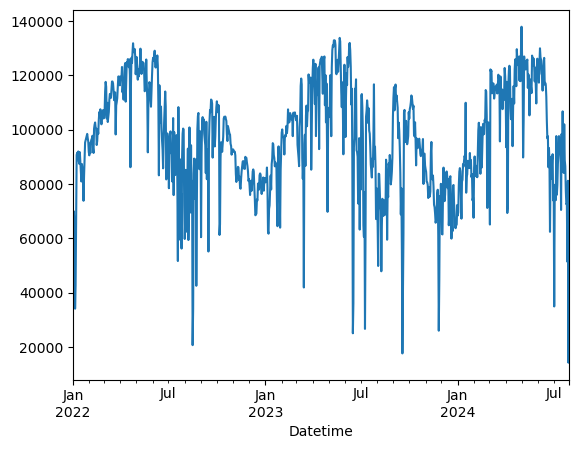

In [22]:
df2 = df2.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day', 'HR': 'hour'})
df2['Datetime'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour']])
df2.set_index('Datetime', inplace=True)
df2['Power_Output_kW'].resample('D').mean().plot()

<Axes: xlabel='Datetime'>

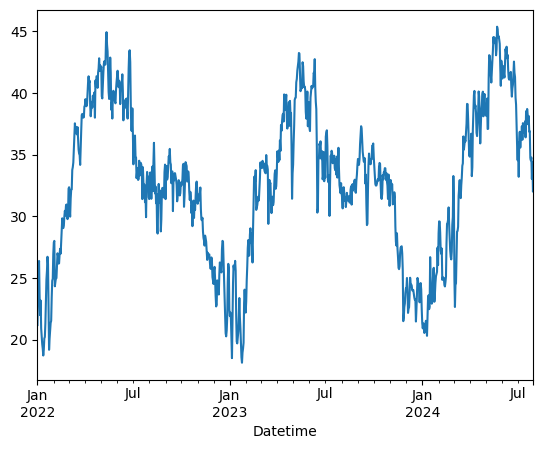

In [24]:

df2['Updated_T_C'].resample('D').mean().plot()

<Axes: xlabel='Datetime'>

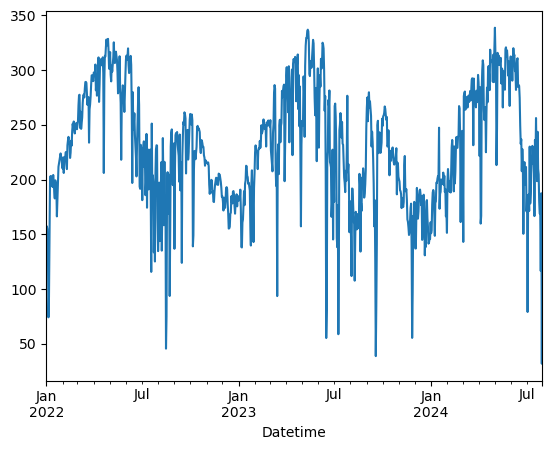

In [25]:
df2['ALLSKY_SFC_SW_DWN'].resample('D').mean().plot()

In [9]:
# Define Improved Hybrid KNN + ANN model
class ImprovedHybridKNN_ANN:
    def __init__(self, k=7, hidden_layer_sizes=(64, 32), activation='relu'):
        self.k = k
        self.knn = KNeighborsRegressor(n_neighbors=k)
        self.scaler = StandardScaler()
        self.ann = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            max_iter=1000,
            random_state=42
        )
    
    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        knn_preds = self.knn.fit(X_scaled, y).predict(X_scaled).reshape(-1, 1)
        X_hybrid = np.hstack((X_scaled, knn_preds))
        self.ann.fit(X_hybrid, y)
    
    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        knn_preds = self.knn.predict(X_scaled).reshape(-1, 1)
        X_hybrid = np.hstack((X_scaled, knn_preds))
        return self.ann.predict(X_hybrid)


k = 1 → RMSE = 7002.7025
k = 2 → RMSE = 5932.4971
k = 3 → RMSE = 5635.5975
k = 4 → RMSE = 5446.6778
k = 5 → RMSE = 5356.9500
k = 6 → RMSE = 5293.3647
k = 7 → RMSE = 5311.1197
k = 8 → RMSE = 5337.3500
k = 9 → RMSE = 5273.8513
k = 10 → RMSE = 5298.2135
k = 11 → RMSE = 5313.7878
k = 12 → RMSE = 5350.6034
k = 13 → RMSE = 5345.6745
k = 14 → RMSE = 5368.3256
k = 15 → RMSE = 5384.1424
k = 16 → RMSE = 5402.6843
k = 17 → RMSE = 5424.5484
k = 18 → RMSE = 5519.3127
k = 19 → RMSE = 5513.5795
k = 20 → RMSE = 5567.6070


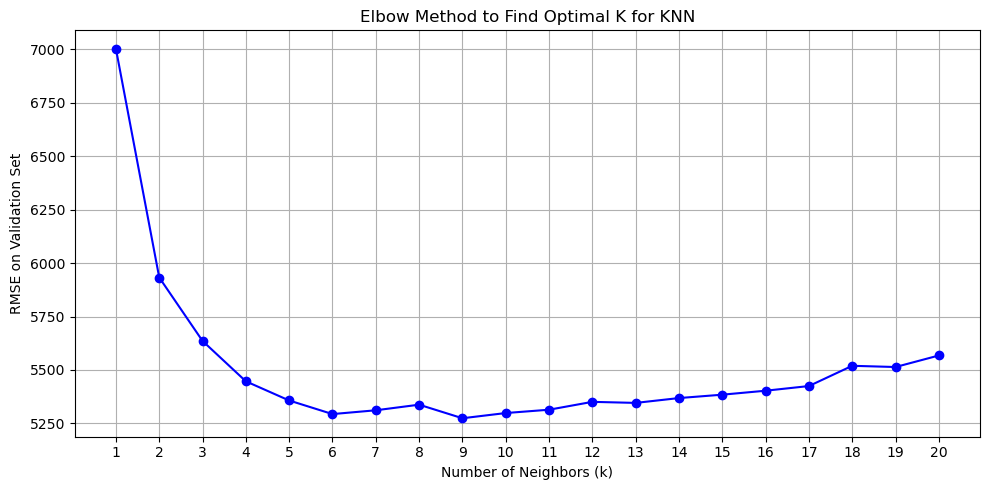

Best k based on lowest RMSE: 9


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming ImprovedHybridKNN_ANN is already defined

# Step 1: Split your data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Try different k values and calculate RMSE
k_values = list(range(1, 21))
errors = []

for k in k_values:
    model = ImprovedHybridKNN_ANN(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)  # RMSE
    errors.append(rmse)
    print(f"k = {k} → RMSE = {rmse:.4f}")

# Step 3: Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, errors, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method to Find Optimal K for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE on Validation Set')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# Step 4: Find the best k
best_k = k_values[np.argmin(errors)]
print("Best k based on lowest RMSE:", best_k)


In [13]:
# Define all models including improved hybrid
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "HybridKNN_ANN": ImprovedHybridKNN_ANN(k=9)
}


In [14]:
import time

# Train and evaluate all models with extended metrics
results = []
for name, model in models.items():
    start_time = time.time()
    
    if "Hybrid" in name:
        model.fit(X_train.values, y_train.values)
        y_pred = model.predict(X_test.values)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    medae = median_absolute_error(y_test, y_pred)
    maxerr = max_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    duration = end_time - start_time

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae,
        "Max Error": maxerr,
        "R2": r2,
        "Explained Variance": evs,
        "Time (s)": duration
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+11, tolerance: 2.867e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.315e+11, tolerance: 2.867e+10
  model = cd_fast.enet_coordinate_descent(


              Model          MAE           MSE         RMSE      MAPE (%)  \
5      RandomForest   333.281482  5.782006e+05   760.395031  2.473587e-01   
4      DecisionTree   631.275758  1.881386e+06  1371.636426  4.423322e-01   
6        KNeighbors  1315.507679  6.979890e+06  2641.948105  4.091682e+16   
7     HybridKNN_ANN  3041.739104  2.781351e+07  5273.851349  8.465616e+19   
2             Lasso  4994.467115  4.689844e+07  6848.243684  6.075373e+20   
0  LinearRegression  4994.308128  4.690180e+07  6848.489217  6.069265e+20   
1             Ridge  4994.307494  4.690181e+07  6848.489284  6.069262e+20   
3        ElasticNet  4989.125577  4.690928e+07  6849.035161  6.050483e+20   

     Median AE     Max Error        R2  Explained Variance   Time (s)  
5    15.624613  10312.671463  0.999963            0.999963  15.658349  
4    23.057303  20913.099505  0.999881            0.999881   0.237392  
6    83.891121  16769.150564  0.999558            0.999558   0.033995  
7  1136.786516  35

C:\Users\harsh\AppData\Local\Temp\ipykernel_20748\2273568418.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\harsh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


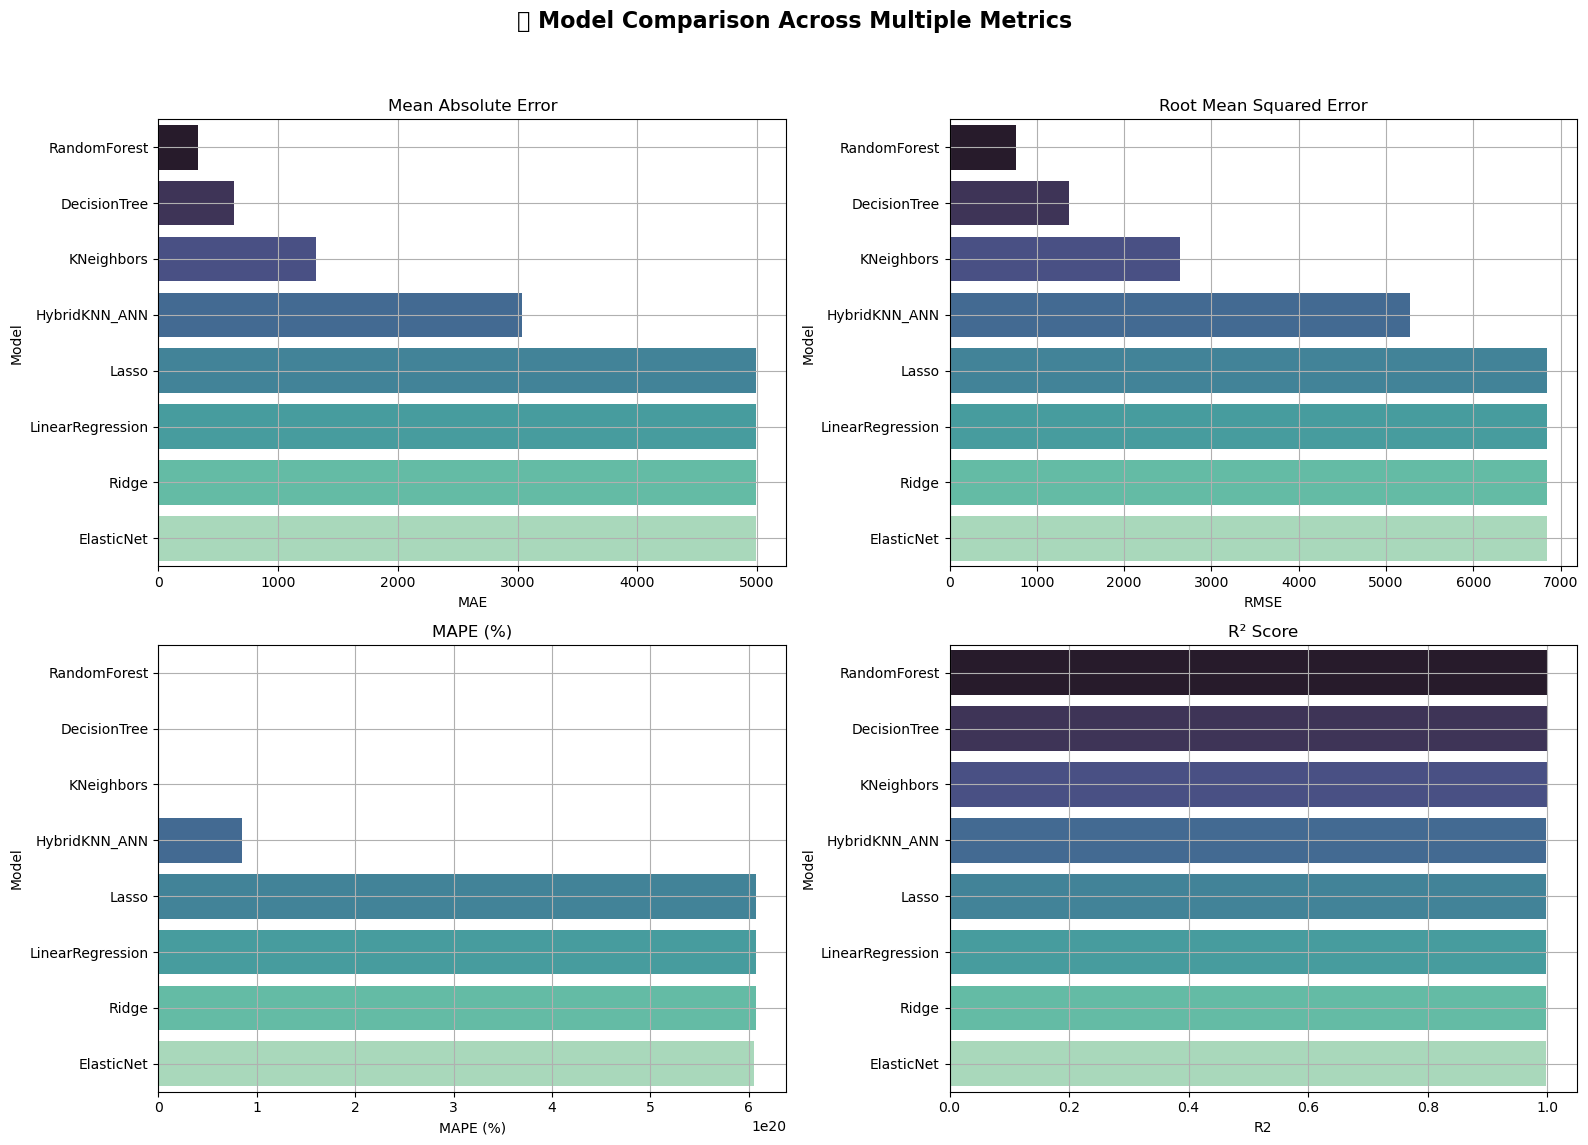

In [15]:
# Visual comparison of key metrics
metrics = ['MAE', 'RMSE', 'MAPE (%)', 'R2']
titles = ['Mean Absolute Error', 'Root Mean Squared Error', 'MAPE (%)', 'R² Score']

plt.figure(figsize=(16, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y="Model", data=results_df, palette="mako")
    plt.title(titles[i - 1])
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.grid(True)

plt.suptitle("🔍 Model Comparison Across Multiple Metrics", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


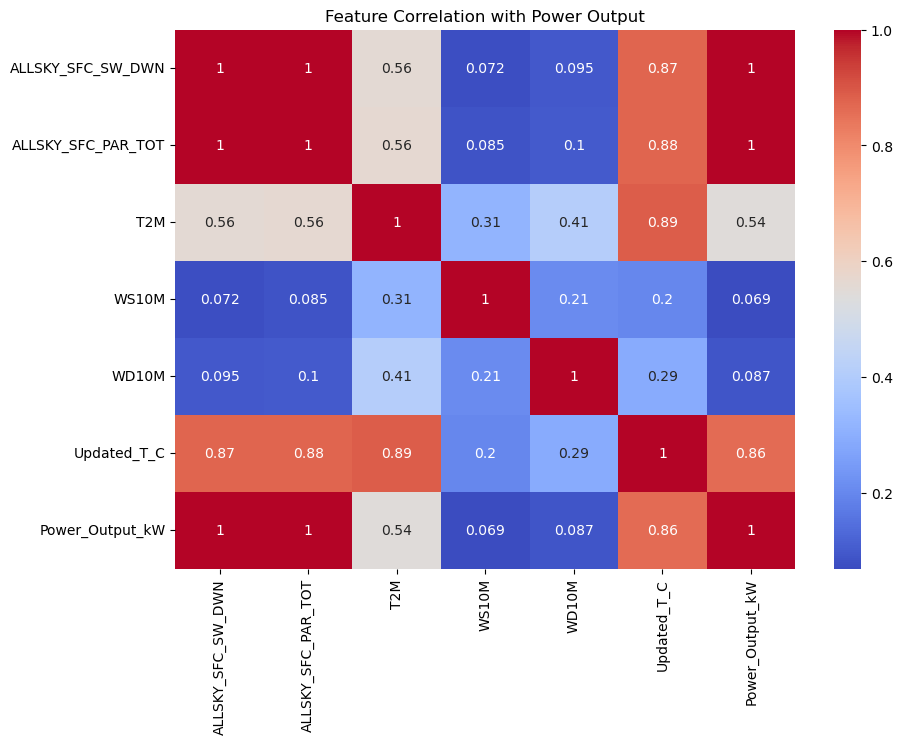

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_PAR_TOT", "T2M",
    "WS10M", "WD10M", "Updated_T_C", "Power_Output_kW"
]

corr = df[features].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Power Output")
plt.show()


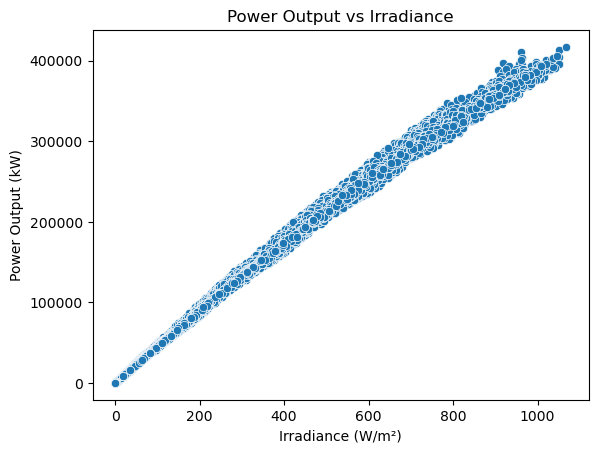

In [41]:
sns.scatterplot(x="ALLSKY_SFC_SW_DWN", y="Power_Output_kW", data=df)
plt.title("Power Output vs Irradiance")
plt.xlabel("Irradiance (W/m²)")
plt.ylabel("Power Output (kW)")
plt.show()


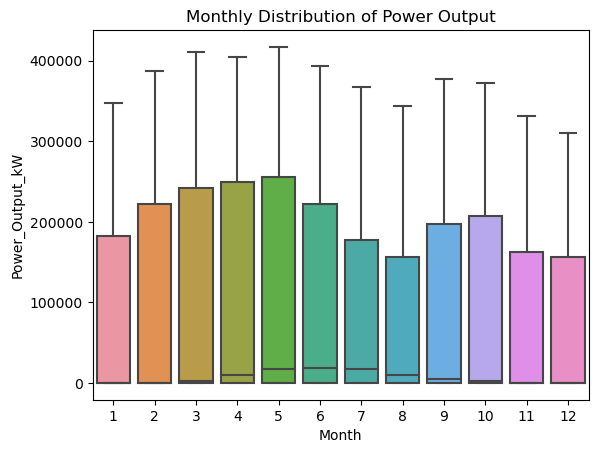

In [42]:
df["Month"] = df.index.month
sns.boxplot(x="Month", y="Power_Output_kW", data=df)
plt.title("Monthly Distribution of Power Output")
plt.show()

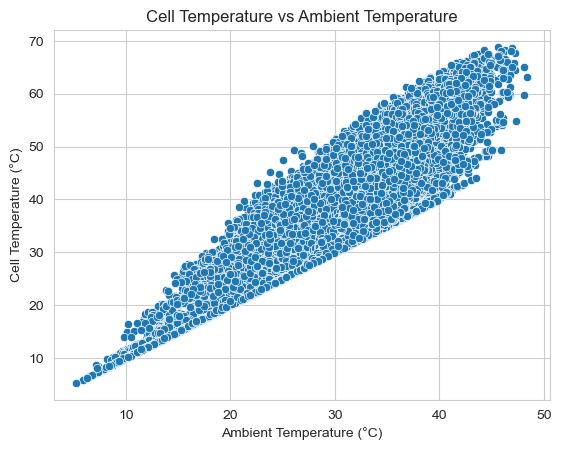

In [49]:
sns.scatterplot(x="T2M", y="Updated_T_C", data=df)
plt.title("Cell Temperature vs Ambient Temperature")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Cell Temperature (°C)")
plt.show()

('model_metrics_summary.csv',
 'model_metrics_summary.xlsx',
 'model_metrics_summary.png')

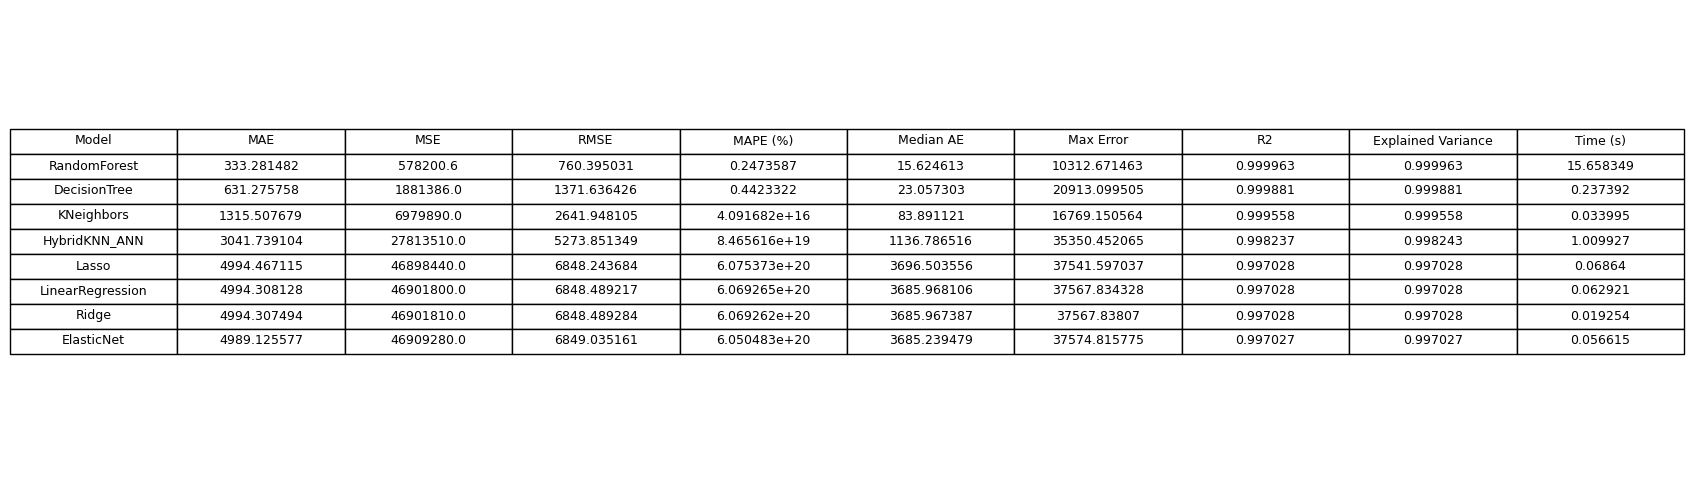

In [43]:
# Re-import necessary libraries due to code execution environment reset
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {
    "Model": [
        "RandomForest", "DecisionTree", "KNeighbors", "HybridKNN_ANN",
        "Lasso", "LinearRegression", "Ridge", "ElasticNet"
    ],
    "MAE": [
        333.281482, 631.275758, 1315.507679, 3041.739104,
        4994.467115, 4994.308128, 4994.307494, 4989.125577
    ],
    "MSE": [
        5.782006e+05, 1.881386e+06, 6.979890e+06, 2.781351e+07,
        4.689844e+07, 4.690180e+07, 4.690181e+07, 4.690928e+07
    ],
    "RMSE": [
        760.395031, 1371.636426, 2641.948105, 5273.851349,
        6848.243684, 6848.489217, 6848.489284, 6849.035161
    ],
    "MAPE (%)": [
        2.473587e-01, 4.423322e-01, 4.091682e+16, 8.465616e+19,
        6.075373e+20, 6.069265e+20, 6.069262e+20, 6.050483e+20
    ],
    "Median AE": [
        15.624613, 23.057303, 83.891121, 1136.786516,
        3696.503556, 3685.968106, 3685.967387, 3685.239479
    ],
    "Max Error": [
        10312.671463, 20913.099505, 16769.150564, 35350.452065,
        37541.597037, 37567.834328, 37567.838070, 37574.815775
    ],
    "R2": [
        0.999963, 0.999881, 0.999558, 0.998237,
        0.997028, 0.997028, 0.997028, 0.997027
    ],
    "Explained Variance": [
        0.999963, 0.999881, 0.999558, 0.998243,
        0.997028, 0.997028, 0.997028, 0.997027
    ],
    "Time (s)": [
        15.658349, 0.237392, 0.033995, 1.009927,
        0.068640, 0.062921, 0.019254, 0.056615
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "model_metrics_summary.csv"
df.to_csv(csv_path, index=False)

# Save to Excel
excel_path = "model_metrics_summary.xlsx"
df.to_excel(excel_path, index=False)

# Save as Image
fig, ax = plt.subplots(figsize=(18, 6))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.5)

image_path = "model_metrics_summary.png"
plt.savefig(image_path, bbox_inches='tight')

csv_path, excel_path, image_path
